# Linear regression using robust functions


## 1. Introduction

### 1.1. Implement the proposed method using gradient descent with backtracking (or a small constant α value). You may check your method with a randomly generated set of points.

In [1]:
import numpy as np
import math as math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 

In [2]:
# Generate data

np.random.seed = 1234

m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], 
                [math.sin(angle), math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)
data1 = c

In [3]:
s

array([[50.5, 49.5],
       [49.5, 50.5]])

#### Function to implementing backtracking gradient descent

In [4]:
def minimize_backtracking_descent(x_initial, func, grad_func, convergence_criterion=1e-6):
    ''' Find a minimum of funcion "func" using backtracking gradient descent '''

    # Initial value
    x_new = x_initial
    F_new = func(x_new)

    # Iterate until end condition is met or we reach 5000 iterations (to prevent infinite loops)
    for num_iter in range(5000):
        x = x_new
        F = F_new
        
        # Compute gradient 
        dx = grad_func(x)

        alpha=10
        # Inner loop to choose an alpha value, maximum 20 iterations (alpha will be divided by 2**40, approx. 1e12)
        for j in range(80):
            x_new = x - alpha*dx
            F_new = func(x_new)
            # print('num_iter={} alpha={} F={}, F_new={}, x_new={}'.format(num_iter, alpha, F, F_new, x_new))
            # Repeat until reducing alpha makes F decrease
            if F_new<F:
                break
            alpha = alpha/2
        # End of inner loop
        
        # Repeat until the gradient size is less than a defined threshold
        if (dx[0]**2 + dx[1]**2) < convergence_criterion:
            break
    # End of outer loop
    
    return x_new

#### Regression using least squares

In [5]:
def error_leastsq(e):
    return e**2 / 2

def func_leastsq(w, data):
    '''Least squares error for the regression line defined by parameter vector w and the data points (x,y)'''
    data_x = data[:,0]
    data_y = data[:,1]
    
    e = w[0]*data_x + w[1] - data_y
    return np.sum( error_leastsq(e) )
    
def grad_leastsq(w, data):
    '''Gradient of function leastsq respect to vector w'''
    data_x = data[:,0]
    data_y = data[:,1]

    e = w[0]*data_x + w[1] - data_y
    grad_w0 = np.sum( data_x * e )
    grad_w1 = np.sum( e )
    return np.array([grad_w0, grad_w1], dtype=float)


Regression parameters: [ 0.99120144 -0.06650279]


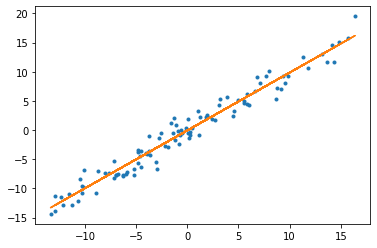

In [6]:
def func_f(w):
    return func_leastsq(w, data1)
def grad_f(w):
    return grad_leastsq(w, data1)
    
w_leastsq_nooutliers = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_leastsq_nooutliers)

# Scatter plot with regression line
data_x = data1[:,0]
data_y = data1[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_leastsq_nooutliers[1] + w_leastsq_nooutliers[0] * data_x, '-')
plt.show()

### 1.2. Check the sensitivity of the method to outliers

In [7]:
# Create outlier to check how it impacts the estimated parameters
data2 = np.copy(data1)
data2[1] = [-40,20]

Regression parameters: [0.65609776 0.22862139]


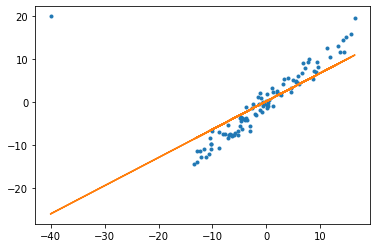

In [8]:
def func_f(w):
    return func_leastsq(w, data2)
def grad_f(w):
    return grad_leastsq(w, data2)
    
w_leastsq_1_outlier = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_leastsq_1_outlier)

# Scatter plot with regression line
data_x = data2[:,0]
data_y = data2[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_leastsq_1_outlier[1] + w_leastsq_1_outlier[0] * data_x, '-')
plt.show()

**Comment:** We see that the regression using least squares can be very sensitive to just one large outlier.

Now we check what happens if we have a large number of outliers, say 10% of the data.

In [41]:
np.random.seed = 2345

# Alter the x value for 20% of the points
noise = np.zeros(data1.shape, dtype=float)
for i in range(len(data1)):
    if np.random.random() < 0.2:
        noise[i,1] = +20
data3 = data1 + noise

# Alter the y value for 40% of the points
noise = np.zeros(data1.shape, dtype=float)
for i in range(len(data1)):
    if np.random.random() < 0.4:
        noise[i,1] = +20
data4 = data1 + noise
noise[0:20]

array([[ 0.,  0.],
       [ 0., 20.],
       [ 0., 20.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., 20.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0., 20.],
       [ 0.,  0.],
       [ 0., 20.],
       [ 0., 20.],
       [ 0.,  0.],
       [ 0., 20.],
       [ 0.,  0.],
       [ 0., 20.]])

Regression parameters: [0.98586858 4.93125933]


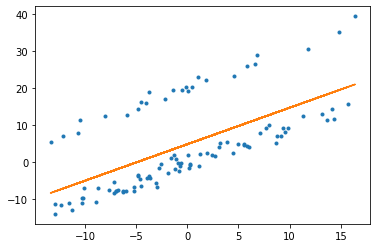

In [42]:
def func_f(w):
    return func_leastsq(w, data3)
def grad_f(w):
    return grad_leastsq(w, data3)
    
w_leastsq_noise20pct = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_leastsq_noise20pct)

# Scatter plot with regression line
data_x = data3[:,0]
data_y = data3[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_leastsq_noise20pct[1] + w_leastsq_noise20pct[0] * data_x, '-')
plt.show()

**Comment:** In data with a 20% of outliers, the regression using least squares error is not useful.

# 2. Robust functions

### 2.1. Plot the least squares function and compare it with the Cauchy function

In [43]:
def error_cauchy(e, c_constant=1):
    return c_constant**2/2 * np.log( 1 + (1/c_constant * e)**2 )

def func_cauchy(w, data, c_constant=1):
    '''Mean squared error for the regression line defined by vector w and the points in vectors (x,y)'''
    data_x = data[:,0]
    data_y = data[:,1]

    e = w[0]*data_x + w[1] - data_y
    return np.sum( error_cauchy(e, c_constant) )
    
def grad_cauchy(w, data, c_constant=1):
    '''Gradient of function respect to vector w'''
    data_x = data[:,0]
    data_y = data[:,1]

    e = w[0]*data_x + w[1] - data_y
    
    grad_w0 = 0
    grad_w1 = 0
    for i in range(len(e)):
        grad_w0 += data_x[i] * e[i] / ( 1 + (e[i]/c_constant)**2 )
        grad_w1 +=             e[i] / ( 1 + (e[i]/c_constant)**2 )
        
    return np.array([grad_w0, grad_w1], dtype=float)


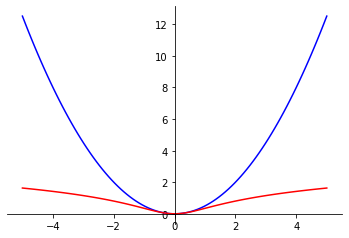

In [44]:
def plot_function(f, f2=None, x_from=-5, x_to=5):
    x = np.linspace(x_from, x_to, 100)
    y1 = f(x)
    if f2 != None:
        y2 = f2(x)
    
    # setting the axes at the centre
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the functions
    plt.plot(x, y1, 'b')
    if f2 != None:
        plt.plot(x, y2, 'r')

    # show the plot
    plt.show()
    
plot_function(f=error_leastsq, f2=error_cauchy)



**Comment:** The Cauchy function is similar to the least squares funcion for values arround 0. For larger values, least squares grows much faster (quadratically), while Cauchy becomes almost flat. This may help when dealing with outliers, as these will not receive a disproporcionate weight.

### 2.2. Regression parameters using Cauchy function

In [45]:
def func_f(w):
    return func_cauchy(w, data1)
def grad_f(w):
    return grad_cauchy(w, data1)
    
w_cauchy_no_outliers = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy_no_outliers)

Regression parameters: [ 1.01095902 -0.22618391]


### 2.3. Compare the results you obtain with the least squares function and the Cauchy function assuming that no outliers are in the dataset

In [46]:
print('Comparison for data with no outliers')
print('Using least squares:', w_leastsq_nooutliers)
print('Using cauchy:', w_cauchy_no_outliers)


Comparison for data with no outliers
Using least squares: [ 0.99120144 -0.06650279]
Using cauchy: [ 1.01095902 -0.22618391]


The result is very similar using least squares and using Cauchy.

### 2.4. Compare now the results with only one outlier

Regression parameters: [ 1.01387061 -0.20452204]


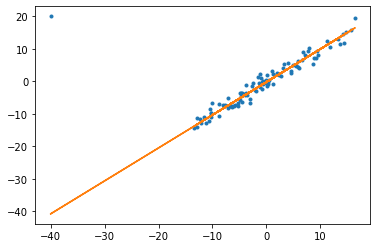

In [47]:
def func_f(w):
    return func_cauchy(w, data2)
def grad_f(w):
    return grad_cauchy(w, data2)
    
w_cauchy_1_outlier = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy_1_outlier)

# Scatter plot with regression line
data_x = data2[:,0]
data_y = data2[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_cauchy_1_outlier[1] + w_cauchy_1_outlier[0] * data_x, '-')
plt.show()

In [48]:
print('Comparison for data with 1 outlier')
print('Using least squares:', w_leastsq_1_outlier)
print('Using cauchy:', w_cauchy_1_outlier)

Comparison for data with 1 outlier
Using least squares: [0.65609776 0.22862139]
Using cauchy: [ 1.01387061 -0.20452204]


With one outlier, using Cauchy is much more robust than using least squares.

### 2.5. Test the influence of the parameter c in the obtained regression.

You may, for instance, check
the results obtained with c = 1, c = 100, c = 1/100 and c = 1/1000. Can you reason why
these results are obtained? To do this, you are recommended to compare the corresponding
ρ(u) functions.

Regression parameters: [0.70645125 0.18473684]


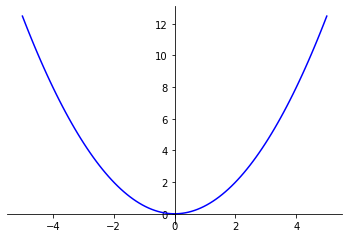

In [49]:
# Cauchy with c_constant=100

def func_f(w):
    return func_cauchy(w, data2, c_constant=100)
def grad_f(w):
    return grad_cauchy(w, data2, c_constant=100)
    
w_cauchy100_1_outlier = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy100_1_outlier)

plot_function(lambda x: error_cauchy(x, c_constant=100))

**Comment:** At the order of magnitude of the data points, the Cauchy function with C=100 is almost equivalent to the least squares function. Therefore, as it happens with least squares, the regression is not robust to outliers.

Regression parameters: [ 1.05325632 -0.30373185]


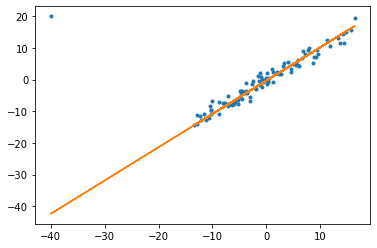

In [50]:
# Cauchy with c_constant=0.01

def func_f(w):
    return func_cauchy(w, data2, c_constant=0.01)
def grad_f(w):
    return grad_cauchy(w, data2, c_constant=0.01)
    
w_cauchy_dot01_1_outlier = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy_dot01_1_outlier)

# Scatter plot with regression line
data_x = data2[:,0]
data_y = data2[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_cauchy_dot01_1_outlier[1] + w_cauchy_dot01_1_outlier[0] * data_x, '-')
plt.show()

In [51]:
# Cauchy with c_constant=0.001

def func_f(w):
    return func_cauchy(w, data2, c_constant=0.001)
def grad_f(w):
    return grad_cauchy(w, data2, c_constant=0.001)
    
w_cauchy_dot001_1_outlier = minimize_backtracking_descent([0,0], func_f, grad_f, convergence_criterion=1e-12)
print('Regression parameters:', w_cauchy_dot001_1_outlier)

# Note: The convergence criterion had to be set to a very small value in order to achieve convergence. 
# The reason is that the values of the gradient are very small.

Regression parameters: [0.24882934 0.12273076]


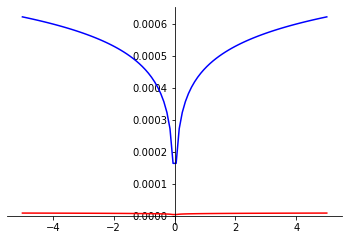

In [52]:
# Plot of Cauchy functions with c=0.01 and c=0.001
plot_function(f =lambda x: error_cauchy(x, c_constant=0.01), 
              f2=lambda x: error_cauchy(x, c_constant=0.001))

**Comment:** When using the Cauchy function with a parameter c=0.01, the function gets almost flat for values beyond +-3. This means that very large errors have almost the same weight as relatively small errors. The resulting regression model does not seem very useful.

If the parameter is c=0.001, the curve is very flat starting on points very close to 0.

**Conclusions:** 

The least squares function gives great importance to points that are far from zero. This causes outliers to have a large impact on the parameter estimation of the regression.

The Cauchy function behaves in a very similar way to the least squares function for points close to zero. However, for points that are further from zero the growth is much smaller. At what distance from zero this behaviour changes, depends on the Cauchy parameter c.

With c=100, the Cauchy function looks almost the same as the x^2 function in the range (-10,10). As this is the order of magnitude in which the outlier falls, the outlier has a high impact, as it did with least squares.

With c=1, as we saw before, the Cauchy function gives much less importance to the outlier. This is a good choice of the parameter if we want a robust regression with the data we have.

With c=0.01 and less, the Cauchy function is not helpful to calculate a regression on this data because it discriminates too little between medium and large errors.

### 2.6. Introduce more outliers and use c = 1 and c = 1/100

On the previously generated set "data3", that has a 20% of outliers, we will fit a regression using Cauchy with c=1

Regression parameters: [ 0.98487798 -0.26467137]


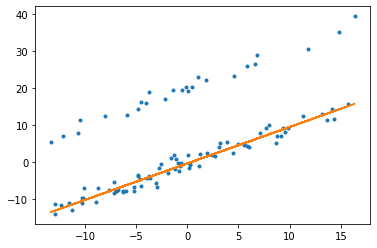

In [53]:
# Cauchy with c_constant=1, data with 20% outliers

def func_f(w):
    return func_cauchy(w, data3, c_constant=1)
def grad_f(w):
    return grad_cauchy(w, data3, c_constant=1)
    
w_cauchy_noise20pct = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy_noise20pct)

# Scatter plot with regression line
data_x = data3[:,0]
data_y = data3[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_cauchy_noise20pct[1] + w_cauchy_noise20pct[0] * data_x, '-')
plt.show()

Regression parameters: [0.97640608 0.05115917]


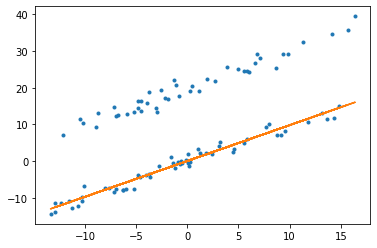

In [54]:
# Cauchy with c_constant=1, data with 40% outliers

def func_f(w):
    return func_cauchy(w, data4, c_constant=1)
def grad_f(w):
    return grad_cauchy(w, data4, c_constant=1)
    
w_cauchy_noise10pct = minimize_backtracking_descent([0,0], func_f, grad_f)
print('Regression parameters:', w_cauchy_noise10pct)

# Scatter plot with regression line
data_x = data4[:,0]
data_y = data4[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_cauchy_noise10pct[1] + w_cauchy_noise10pct[0] * data_x, '-')
plt.show()

Regression parameters: [1.00701781 0.24442488]


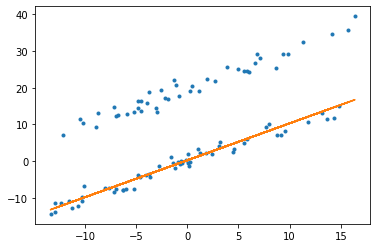

In [55]:
# Cauchy with c_constant=0.01, data with 40% outliers

def func_f(w):
    return func_cauchy(w, data4, c_constant=0.01)
def grad_f(w):
    return grad_cauchy(w, data4, c_constant=0.01)
    
w_cauchy_dot01_noise10pct = minimize_backtracking_descent([0,0], func_f, grad_f, convergence_criterion=1e-12)
print('Regression parameters:', w_cauchy_dot01_noise10pct)

# Scatter plot with regression line
data_x = data4[:,0]
data_y = data4[:,1]
plt.plot(data_x, data_y, '.')
plt.plot(data_x, w_cauchy_dot01_noise10pct[1] + w_cauchy_dot01_noise10pct[0] * data_x, '-')
plt.show()

**Comments:** The regression using Cauchy with c=1 is still robust in data with even up to 40% of outliers.

The regression using Cauchy with c=0.01 is even more robust. In the case with 40% outliers, the slope remains almost the same as before introducing the outliers.